In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# GP-Value Shaping Illustration

This notebook demonstrates the bare-bones GP-Value Shaping model on correlated Landscapes.

In [3]:
import mesa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from abm.model import SocialGPModel
from abm.rewards import make_parent_and_children_cholesky, build_corr_matrix_bare_bones

sns.set_theme(style="whitegrid")

## 1. Correlated Reward Landscapes

We generate correlated reward landscapes where a 'parent' map defines the general structure, and 'children' maps are correlated with it.

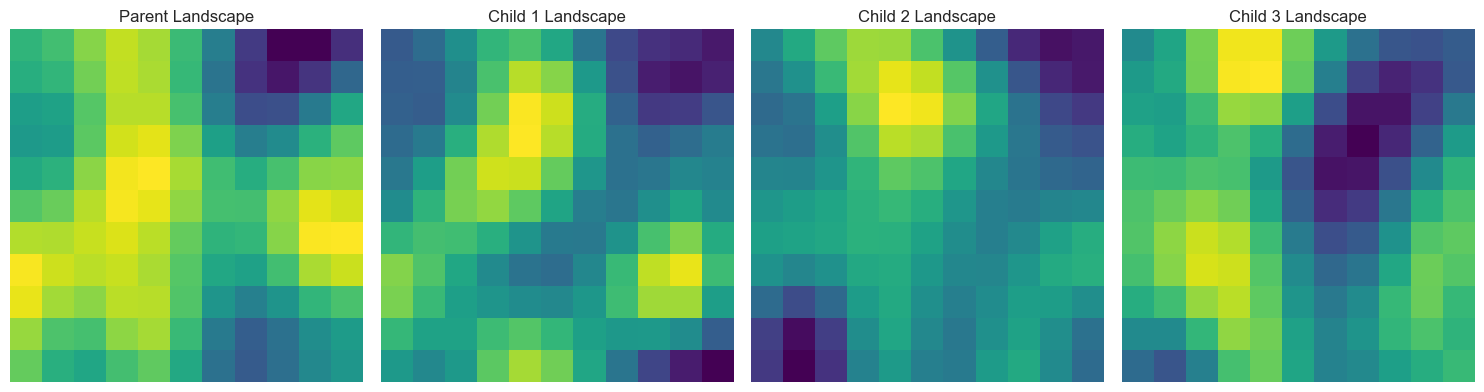

In [4]:
rng = np.random.default_rng(42)
n_children = 3
grid_size = 11

parent, children = make_parent_and_children_cholesky(
    rng=rng,
    grid_size=grid_size,
    n_children=n_children,
    length_scale=2.0
)

fig, axes = plt.subplots(1, n_children + 1, figsize=(15, 4))
axes[0].imshow(parent, cmap='viridis', origin='lower')
axes[0].set_title("Parent Landscape")

for i, child in enumerate(children):
    axes[i+1].imshow(child, cmap='viridis', origin='lower')
    axes[i+1].set_title(f"Child {i+1} Landscape")

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()

## 2. Running the Model

We run a simulation with 5 agents using Value-Shaping with $\alpha=0.5$.

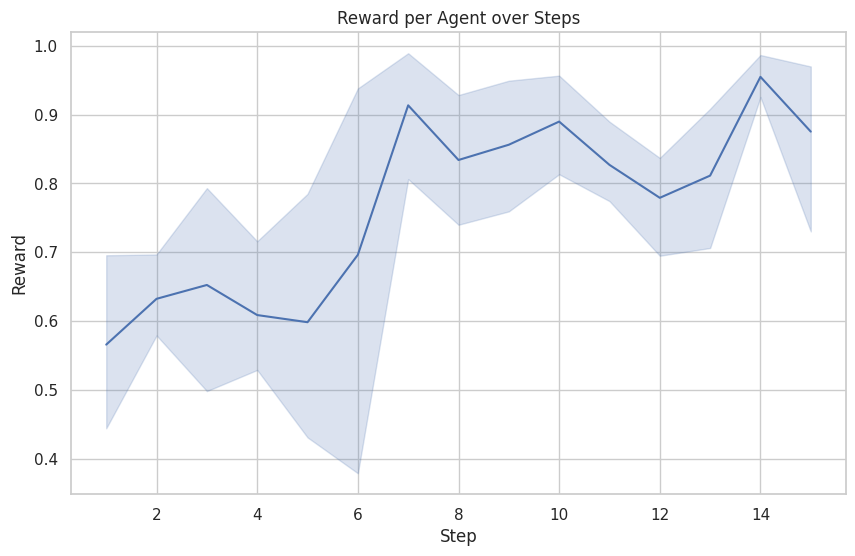

In [13]:
model = SocialGPModel(n=5, grid_size=11, alpha=0.5, seed=42, beta=0.33)
for _ in range(15):
    model.step()

agent_results = model.datacollector.get_agent_vars_dataframe()

plt.figure(figsize=(10, 6))
sns.lineplot(data=agent_results.reset_index(), x="Step", y="reward")
plt.title("Reward per Agent over Steps")
plt.xlabel("Step")
plt.ylabel("Reward")
plt.show()

## 3. Comparing Social Influence ($\alpha$)

The parameter $\alpha$ controls the weight of social information relative to private information.

In [14]:
params = {
    "n": [5],
    "beta": 0.3,
    "length_scale": 1.11,
    "tau": 0.01,
    "alpha": [0.0, 0.5, 1.0],
    "seed": range(10)
}

batch_results = mesa.batch_run(
    SocialGPModel,
    parameters=params,
    max_steps=15,
    display_progress=True,
    data_collection_period=1,
    number_processes=None,
)

  0%|          | 0/30 [00:00<?, ?it/s]

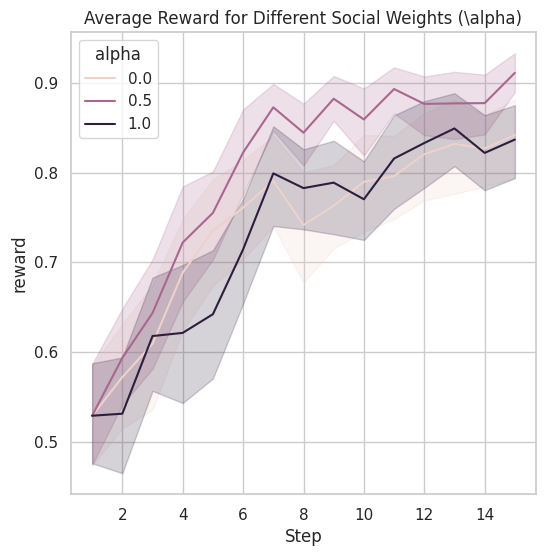

In [15]:
df_batch = pd.DataFrame(batch_results)
df_batch = df_batch[df_batch.AgentID.notna()]

plt.figure(figsize=(6, 6))
sns.lineplot(data=df_batch, x="Step", y="reward", hue="alpha")
plt.title("Average Reward for Different Social Weights (\\alpha)")
plt.show()

In [ ]:
df_batch

,RunId,iteration,Step,n,beta,length_scale,tau,alpha,seed,rng,avg_cumulative_reward,avg_reward,AgentID,choice,reward,cumulative_reward
669,0,0,13,5,0.3,1.11,0.01,0.0,0,None,8.754123,0.673394,1.0,"(10, 3)",0.875358,5.882152
670,0,0,13,5,0.3,1.11,0.01,0.0,0,None,8.754123,0.673394,2.0,"(9, 0)",0.877069,9.477326
671,0,0,13,5,0.3,1.11,0.01,0.0,0,None,8.754123,0.673394,3.0,"(10, 3)",1.002227,8.189702
672,0,0,13,5,0.3,1.11,0.01,0.0,0,None,8.754123,0.673394,4.0,"(10, 3)",0.928453,11.721958
673,0,0,13,5,0.3,1.11,0.01,0.0,0,None,8.754123,0.673394,5.0,"(10, 2)",0.973940,8.499478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,29,0,12,5,0.3,1.11,0.01,1.0,9,None,9.392834,0.782736,1.0,"(2, 6)",0.828894,10.231748
759,29,0,15,5,0.3,1.11,0.01,1.0,9,None,11.871687,0.791446,5.0,"(4, 5)",0.834315,10.300425
758,29,0,15,5,0.3,1.11,0.01,1.0,9,None,11.871687,0.791446,4.0,"(4, 4)",0.798154,11.733629
757,29,0,15,5,0.3,1.11,0.01,1.0,9,None,11.871687,0.791446,3.0,"(4, 4)",0.942753,13.288338
